In [22]:
import pandas as pd
import matplotlib.pyplot as plt

## Get the Data

In [2]:
!wget "https://archive.org/download/ages-and-heights/AgesAndHeights.pkl" -P ./data/

--2024-08-01 21:07:36--  https://archive.org/download/ages-and-heights/AgesAndHeights.pkl
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia801802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl [following]
--2024-08-01 21:07:38--  https://ia801802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl
Resolving ia801802.us.archive.org (ia801802.us.archive.org)... 207.241.230.172
Connecting to ia801802.us.archive.org (ia801802.us.archive.org)|207.241.230.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2406 (2.3K) [application/octet-stream]
Saving to: ‘./data/AgesAndHeights.pkl’

AgesAndHeights.pkl  100%[===================>]   2.35K  --.-KB/s    in 0s      

2024-08-01 21:07:48 (588 MB/s) - ‘./data/AgesAndHeights.pkl’ saved [2406/2406]



In [7]:
raw_data = pd.read_pickle('./data/AgesAndHeights.pkl')
print(raw_data.shape)
raw_data.head()

(100, 2)


,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414


## Visualize the Data

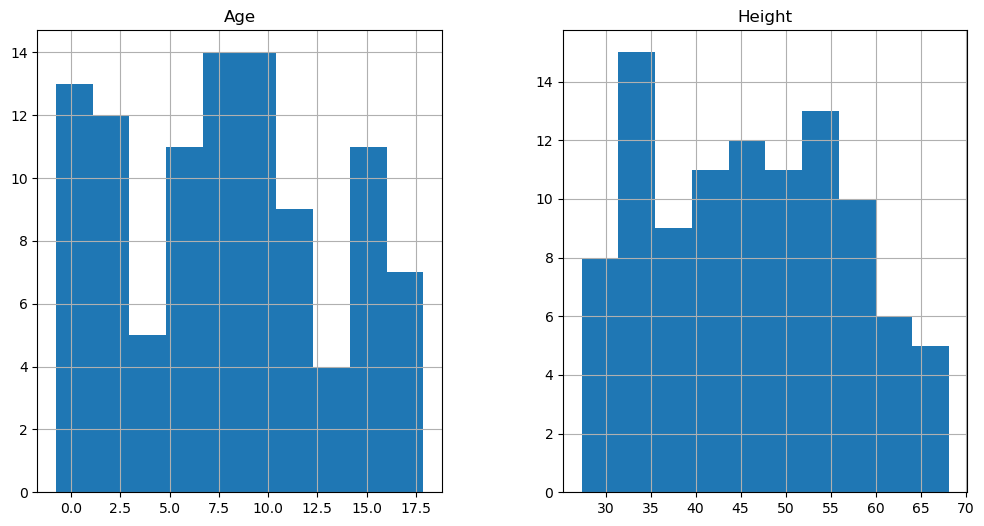

In [11]:
raw_data.hist(figsize=(12, 6));

In [12]:
raw_data.describe()

,Age,Height
count,100.000000,100.000000
mean,7.966138,45.955674
std,5.321621,10.787318
min,-0.780853,27.332513
25%,3.048885,36.320107
50%,7.795597,46.178251
75%,11.464331,53.994166
max,17.887852,68.170414


### Data Cleaning

In [19]:
cleaned_data = raw_data[raw_data['Age'] > 0]
print(cleaned_data.shape)
cleaned_data.head()

(93, 2)


,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414


In [20]:
cleaned_data.describe()

,Age,Height
count,93.000000,93.000000
mean,8.595192,47.164420
std,4.975428,10.190036
min,0.195686,29.007696
25%,5.020210,38.287710
50%,8.433330,47.332750
75%,11.923862,54.751892
max,17.887852,68.170414


### Visualize the cleaned data

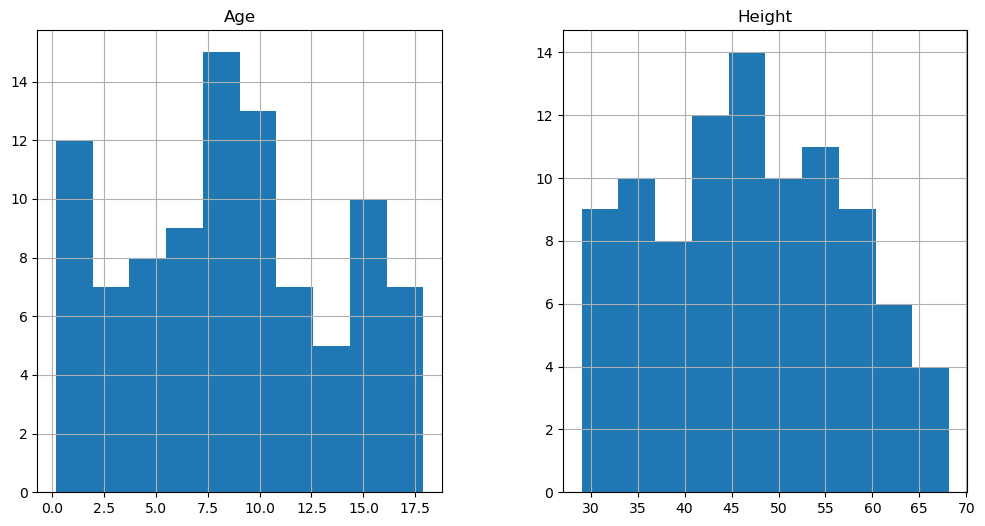

In [21]:
cleaned_data.hist(figsize=(12, 6));

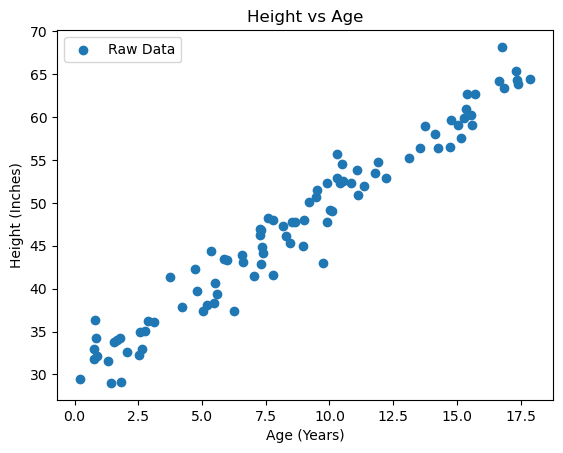

In [24]:
plt.scatter(x=cleaned_data['Age'], y=cleaned_data['Height'], label='Raw Data')
plt.title('Height vs Age')
plt.xlabel('Age (Years)')
plt.ylabel('Height (Inches)')
plt.legend();

## Build the model, and train it!

In [25]:
parameters = {'alpha':40, 'beta': 4}

In [26]:
def y_hat(age, params):
    alpha = params['alpha']
    beta = params['beta']
    return alpha + beta * age

y_hat(5, parameters)

60

In [39]:
def learn_parameters(data, params):
    x, y = data['Age'].values, data['Height'].values
    x_bar, y_bar = x.mean(), y.mean()
    beta = sum((((x - x_bar) * (y - y_bar)) / sum((x - x_bar) ** 2)))
    alpha = y_bar - beta * x_bar
    params['alpha'] = alpha
    params['beta'] = beta

In [40]:
new_parameter = {'alpha': 0, 'beta': 0}
learn_parameters(cleaned_data, new_parameter)
new_parameter

{'alpha': 29.96185761461583, 'beta': 2.0014168989106316}

In [41]:
spaced_age = list(range(18))
spaced_untrained_predictions = [y_hat(x, parameters) for x in spaced_age]
spaced_untrained_predictions

[40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108]

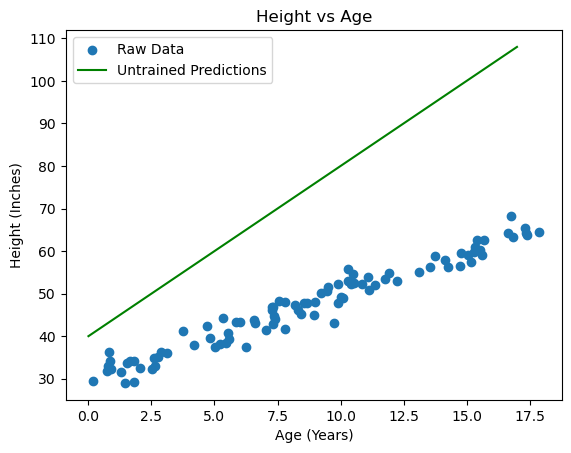

In [42]:
plt.scatter(x=cleaned_data['Age'], y=cleaned_data['Height'], label='Raw Data')
plt.plot(spaced_untrained_predictions, label='Untrained Predictions', color='green')
plt.title('Height vs Age')
plt.xlabel('Age (Years)')
plt.ylabel('Height (Inches)')
plt.legend();

In [43]:
spaced_trained_predictions = [y_hat(x, new_parameter) for x in spaced_age]
spaced_trained_predictions

[29.96185761461583,
 31.96327451352646,
 33.96469141243709,
 35.966108311347725,
 37.96752521025836,
 39.96894210916899,
 41.97035900807962,
 43.97177590699025,
 45.97319280590088,
 47.97460970481151,
 49.97602660372215,
 51.97744350263278,
 53.97886040154341,
 55.98027730045404,
 57.98169419936467,
 59.9831110982753,
 61.984527997185936,
 63.98594489609657]

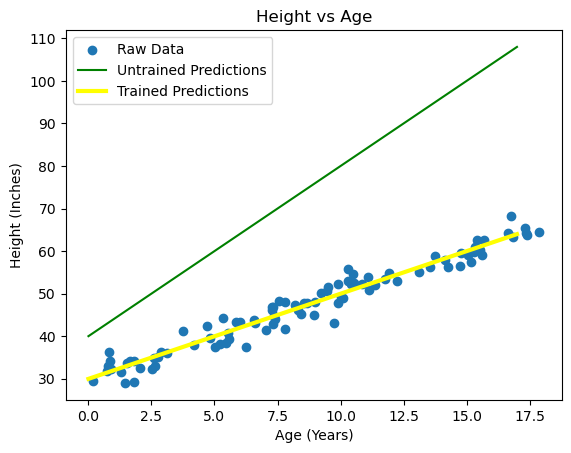

In [47]:
plt.scatter(x=cleaned_data['Age'], y=cleaned_data['Height'], label='Raw Data')
plt.plot(spaced_untrained_predictions, label='Untrained Predictions', color='green')
plt.plot(spaced_trained_predictions, label='Trained Predictions', color='yellow', lw=3)
plt.title('Height vs Age')
plt.xlabel('Age (Years)')
plt.ylabel('Height (Inches)')
plt.legend();

## Use the model - Make some prediction on `UNSEEN` data

In [48]:
new_age = 5
y_hat(new_age, new_parameter)

39.96894210916899